# *Collaborative filtering*

En este notebook vamos a recrear un filtro colaborativo. Es decir, vamos a crear un modelo capaz de sugerir películas a los usuarios en función de las calificaciones de las películas y los gustos de los usuarios.

Empezamos importando el módulo 'collab' para crear modelos de *collaborative filtering* y el módulo 'tabular' para trabajar con tablas. Ambos de la librería *fastai*. 

In [1]:
from fastai.collab import *
from fastai.tabular import *

En el archivo 'csv' del datatset las columnas relevantes están nombradas como 'userId', 'movieId' y 'title'. Creamos las variables 'user', 'item' y 'title' respectivamente.

In [2]:
user,item,title = 'userId', 'movieId', 'title'

En la variable 'path' almacenamos la ruta de acceso al dataset. Para ello empleamos la función 'untar_data' de la librería *fastai*.

In [3]:
path = untar_data(URLs.ML_SAMPLE)

Con la función 'pd.read_csv' abrimos el archivo 'csv' y lo creamos como dataframe en la variable 'ratings'. Imprimimos las 5 primeras entradas.

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


En 'data' creamos el *databunch* con la función 'CollabDataBunch.from_df' y le pasamos los datos.

In [5]:
data = CollabDataBunch.from_df(ratings, seed=42)

En 'y_range' establecemos el rango de valoración de las películas. En este caso de 0 a 5.5.

In [6]:
y_range = [0,5.5]

Creamos el modelo y le pasamos los datos, el tamaño de los vectores y el rango de valoración.

In [7]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

Entrenamos el modelo durante 3 épocas con un 'lr' de 0.005. 

In [8]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.612956,0.993723,00:01
1,0.837871,0.678923,00:01
2,0.656616,0.670120,00:01


## Dataset Movielens

Ahora vamos a probar con el dataset [Movielens 100k](http://files.grouplens.org/datasets/movielens/ml-100k.zip). 

En 'path' asignamos ahora el acceso al nuevo dataset.

In [18]:
path = Config.data_path()/'ml-100k'
path

PosixPath('/storage/ml-100k')

En 'ratings' abrimos el archivo 'csv' referente a las valoraciones y lo convertimos en dataframe con los respectivos nombres de las columnas. Mostramos la cabecera del dataframe.

In [19]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, 
                     names=[user,item, 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


En 'movies' hacemos lo mismo con el archivo de las películas.

In [20]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

Mostramos la cabecera de 'movies'.

In [21]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Como se puede comprobar, tenemos 100.000 valoraciones.

In [22]:
len(ratings)

100000

Creamos el dataframe 'rating_movie' en el que unimos la columna 'title' de 'movies' al dataframe 'ratings', respetando el 'item'. Para ello empleamos la función 'merge'. Mostramos las 5 primeras entradas.

In [25]:
rating_movie = ratings.merge(movies[[item,title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


En 'data', creamos el nuevo *databunch*. Con 'valid_pct' creamos un *validation set* del 10%.

In [26]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

Con 'show_batch' mostramos un ejemplo de lote.

In [27]:
data.show_batch()

userId,title,target
109,Amadeus (1984),4.0
802,Village of the Damned (1995),3.0
405,Before Sunrise (1995),1.0
263,Giant (1956),3.0
453,Field of Dreams (1989),3.0


En 'y_range' establecemos el rango de valoración de las películas. En este caso de 0 a 5.5.

In [28]:
y_range = [0,5.5]

Creamos un nuevo modelo.

In [29]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

Graficamos el *learning rate*.

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


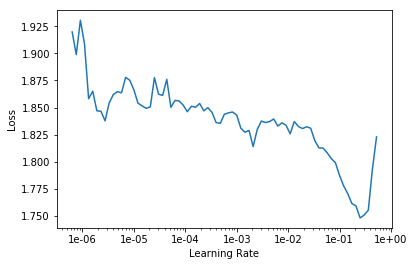

In [30]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

Entrenamos el modelo durante 5 épocas y un 'lr' de 0.005.

In [31]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.932774,0.947915,00:07
1,0.885401,0.892494,00:07
2,0.788294,0.834272,00:07
3,0.653691,0.812498,00:07
4,0.566509,0.811069,00:07


Guardamos y cargamos de nuevo.

In [32]:
learn.save('dotprod')

In [33]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

Mostramos el tamaño de las matrices para los pesos y las *bias*.

In [34]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

En 'g' relizamos algunas modificaciones. Ordenamos 'rating_movie' por 'title'. En 'top_movies' ordenamos la nueva tabla por valoración de forma descendente. Mostramos las primeras 10 películas.

In [35]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

Con la función 'bias' guaradamos las 'bias' con la nueva ordenación en 'movie_bias'.

In [36]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

En 'mean_ratings' vamos a agrupar las películas por valoración, pero en este caso hacemos la media. En 'movie_ratings' creamos la tabla de películas y su respectiva valoración. 

In [39]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

En 'item0' creamos la función anónima 'lambda' con la que seleccionaremos el primer item de 'movie_ratings'.

In [40]:
item0 = lambda o:o[0]

Ordenamos 'movie_ratings' de menor a mayor según el valor de su tensor correspondiente y mostramos las primeras 15 películas.

In [41]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3771),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3220),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2866), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2693), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2613), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2456), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2221), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2220), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2205), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2129), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2112), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2102), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2094), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2021), 'Sgt. Bilko (1996)', 2.5675675675675675),
 (tensor(-0.2005), 'Bio-Dome (1996)'

Ahora invertimos el orden de la lista de películas.

In [42]:
sorted(movie_ratings, key=lambda o:o[0], reverse=True)[:15]

[(tensor(0.5987), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5675), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5580), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5558), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5504), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5411), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5218), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5042), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5007), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4861), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4836), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4787), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4629), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4568), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4499), 'To Kill a Mockingbird (1962)', 4.292237442922374)]

Con la función 'weight' guaradamos los pesos' con la nueva ordenación en 'movie_w'.

In [43]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

Con la función 'pca' reducimos el número de columnas a 3.

In [44]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

Con la función 't' hacemos la transpuesta de la matriz 'movie_pca' y cargamos el resultado en 'fac0', 'fac1' y 'fac2' respectivamente. Creamos una nueva lista 'movie_comp' con el valor del tensor 'fac0' y su película correspondiente.

In [45]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

Ordenamos de mayor a menor y mostramos las 10 primeras.

In [46]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1063), 'Wrong Trousers, The (1993)'),
 (tensor(1.0646), 'Close Shave, A (1995)'),
 (tensor(1.0478), 'Casablanca (1942)'),
 (tensor(1.0160), 'When We Were Kings (1996)'),
 (tensor(1.0045), 'Lawrence of Arabia (1962)'),
 (tensor(0.9807),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9655), 'Chinatown (1974)'),
 (tensor(0.9429), 'Usual Suspects, The (1995)'),
 (tensor(0.9390), 'North by Northwest (1959)'),
 (tensor(0.9353), 'Citizen Kane (1941)')]

Aquí ordenamos de menos a mayor.

In [47]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2477), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.2378), 'Home Alone 3 (1997)'),
 (tensor(-1.1910), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1722), "McHale's Navy (1997)"),
 (tensor(-1.1681), 'Bio-Dome (1996)'),
 (tensor(-1.1549), 'Jungle2Jungle (1997)'),
 (tensor(-1.1438), 'Congo (1995)'),
 (tensor(-1.1354), 'Richie Rich (1994)'),
 (tensor(-1.0959), 'Leave It to Beaver (1997)'),
 (tensor(-1.0803), 'Flipper (1996)')]

Ahora hacemos lo mismo pero con el valor del tensor 'fac1'.

In [48]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [49]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9292), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8791), 'Keys to Tulsa (1997)'),
 (tensor(0.8278), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.8183), 'Stuart Saves His Family (1995)'),
 (tensor(0.8132), 'Brazil (1985)'),
 (tensor(0.7968), 'Trainspotting (1996)'),
 (tensor(0.7920), 'Clockwork Orange, A (1971)'),
 (tensor(0.7885), 'Very Brady Sequel, A (1996)'),
 (tensor(0.7884), 'Jude (1996)'),
 (tensor(0.7765), 'Serial Mom (1994)')]

In [50]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1919), 'Braveheart (1995)'),
 (tensor(-1.1590), 'Titanic (1997)'),
 (tensor(-1.0275), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9864), "It's a Wonderful Life (1946)"),
 (tensor(-0.9293), 'Pretty Woman (1990)'),
 (tensor(-0.9020), 'American President, The (1995)'),
 (tensor(-0.8573), 'Forrest Gump (1994)'),
 (tensor(-0.8487), 'Lion King, The (1994)'),
 (tensor(-0.8199), 'Sleepless in Seattle (1993)'),
 (tensor(-0.8160), "Mr. Holland's Opus (1995)")]

Creamos un gráfico en el que podemos ver la disposición de una lista aleatoria de películas en función del número de valoraciones y su valoración media.

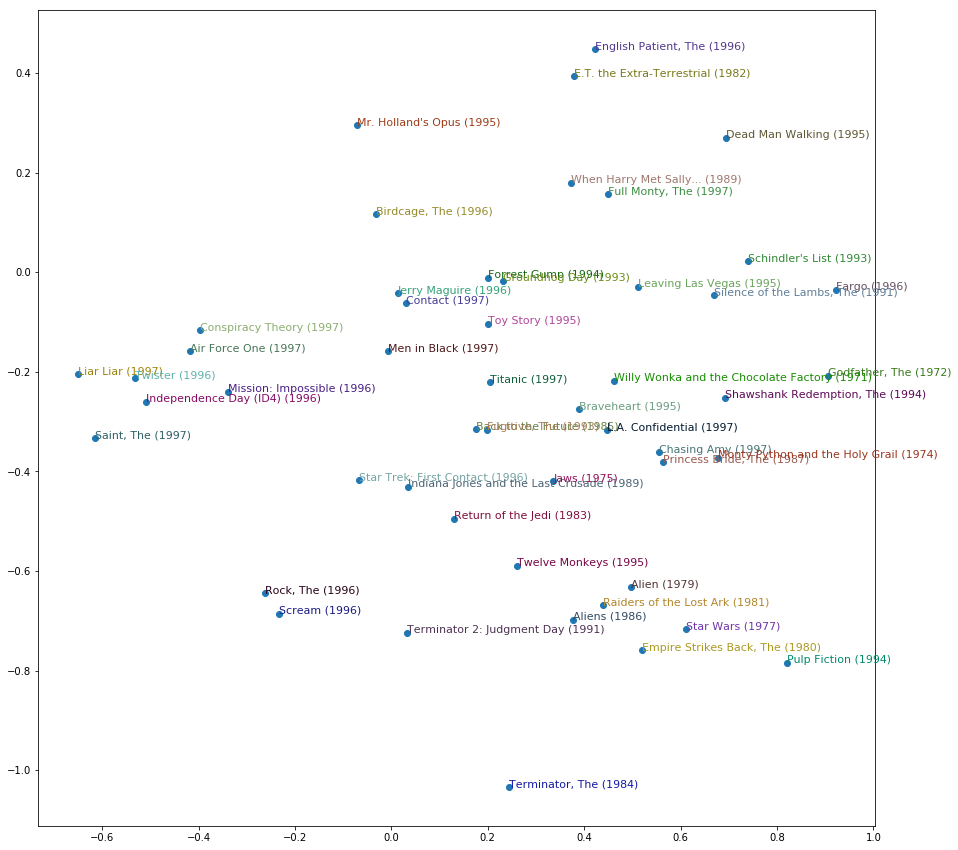

In [52]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X,Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()